
=== Fraud Percentage Table ===


,proportion
Class,
Legitimate,99.69
Fraudulent,0.31


<ipython-input-9-797f61593f82>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='coolwarm')


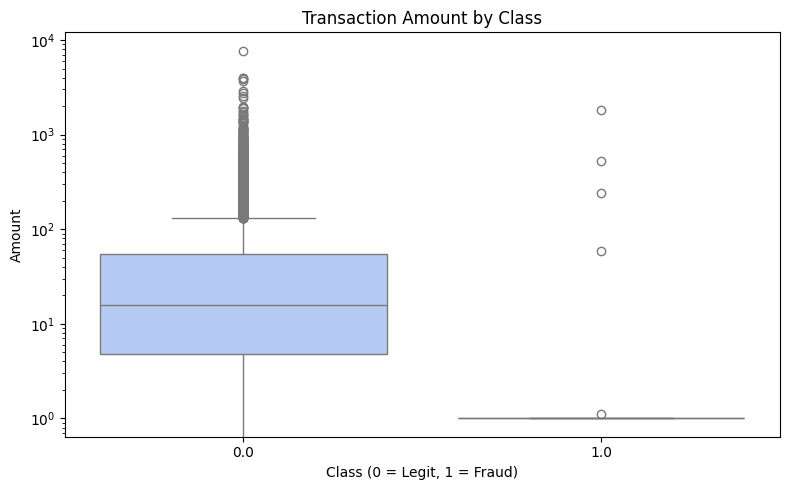

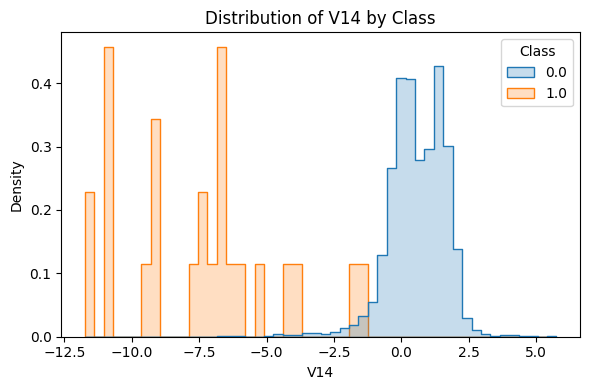

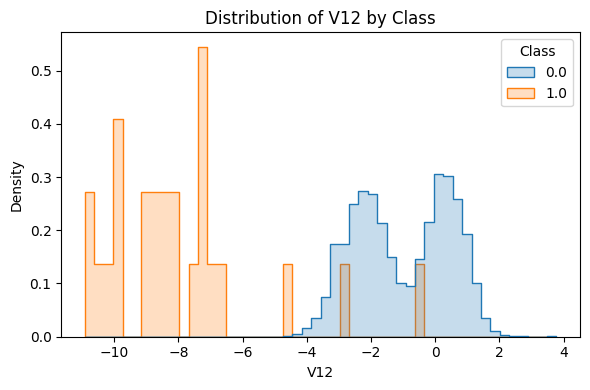

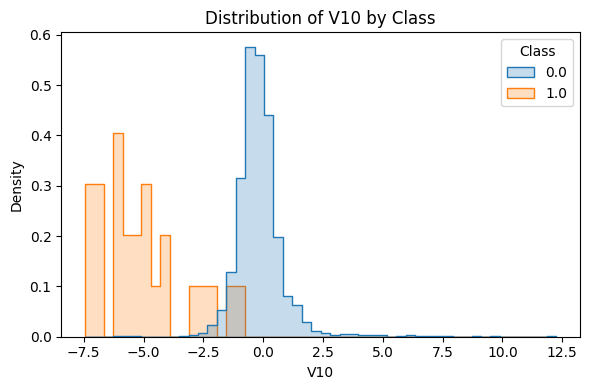

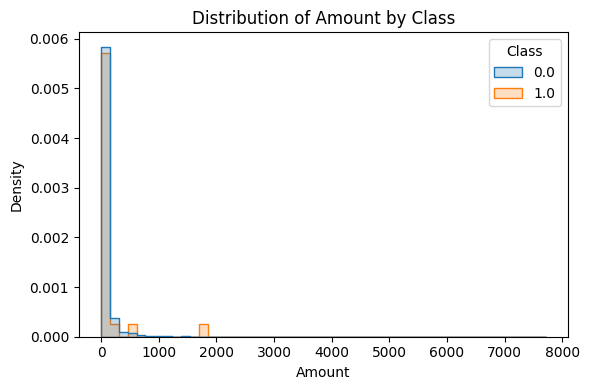


=== Summary Statistics by Class ===


Amount                                        V14            \
             mean median      max  min         std      mean       std   
Class                                                                    
0.0     65.284891  15.95  7712.43  0.0  194.126547  0.586847  1.032758   
1.0    106.308400   1.00  1809.68  0.0  372.676883 -7.538674  2.858696   

            V10            
           mean       std  
Class                      
0.0   -0.148761  1.046266  
1.0   -5.025340  1.880765

<ipython-input-9-797f61593f82>:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_bin = df.groupby("AmountBin")["Class"].mean() * 100


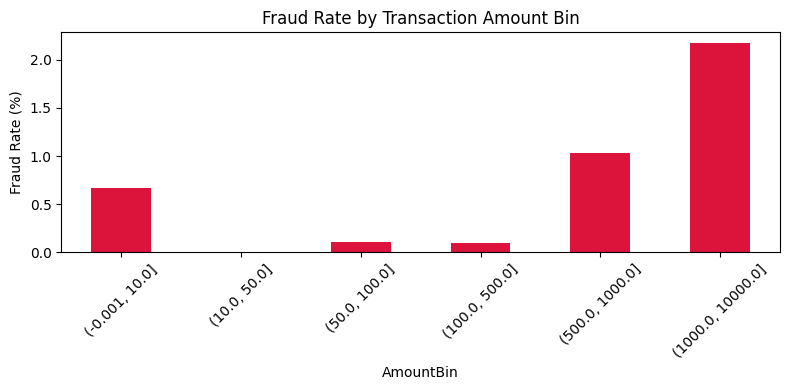


📊 Additional graphs saved:
 - amount_by_class_boxplot.png
 - V14_distribution_by_class.png
 - V12_distribution_by_class.png
 - V10_distribution_by_class.png
 - Amount_distribution_by_class.png
 - fraud_rate_by_amount_bin.png


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("creditcard.csv")

# Drop unnecessary column for analysis
df = df.drop(columns=["Time"])

# ================================
# 📋 1. Percent Fraud Table
# ================================
fraud_percent = df['Class'].value_counts(normalize=True) * 100
print("\n=== Fraud Percentage Table ===")
fraud_percent = fraud_percent.rename({0: "Legitimate", 1: "Fraudulent"})
display(fraud_percent.round(2))  # Display table inline in Jupyter

# ================================
# 📊 2. Transaction Amount by Class
# ================================
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=df, palette='coolwarm')
plt.yscale("log")  # log scale for visibility
plt.title("Transaction Amount by Class")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.tight_layout()
plt.show()  # Show the plot inline in Jupyter

# ================================
# 📉 3. Distribution of Key Features
# ================================
features_to_plot = ['V14', 'V12', 'V10', 'Amount']
for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="Class", element="step", stat="density", common_norm=False, bins=50)
    plt.title(f"Distribution of {col} by Class")
    plt.tight_layout()
    plt.show()  # Show the plot inline in Jupyter

# ================================
# 🧮 4. Summary Stats by Class
# ================================
print("\n=== Summary Statistics by Class ===")
summary_by_class = df.groupby("Class").agg({
    "Amount": ["mean", "median", "max", "min", "std"],
    "V14": ["mean", "std"],
    "V10": ["mean", "std"]
})
display(summary_by_class)  # Display table inline in Jupyter

# ================================
# 📈 5. Fraud Rate vs. Amount Bins
# ================================
df['AmountBin'] = pd.cut(df['Amount'], bins=[0, 10, 50, 100, 500, 1000, 10000], include_lowest=True)
fraud_by_bin = df.groupby("AmountBin")["Class"].mean() * 100

plt.figure(figsize=(8, 4))
fraud_by_bin.plot(kind='bar', color='crimson')
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate by Transaction Amount Bin")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Show the plot inline in Jupyter

# ================================
# ✅ Summary of Generated Files
# ================================
print("\n📊 Additional graphs saved:")
print(" - amount_by_class_boxplot.png")
for col in features_to_plot:
    print(f" - {col}_distribution_by_class.png")
print(" - fraud_rate_by_amount_bin.png")